In [1]:
from cr_knee_fit import experiments
from cr_knee_fit.fit_data import Data, DataConfig

fit_data = Data.load(
    config=DataConfig(
        experiments_elements=[
            *experiments.DIRECT,
            experiments.grapes,
        ],
        experiments_all_particle=[
            # experiments.hawc,
        ],
    ),
    verbose=True,
)

Reading H data for Experiment(name='AMS-02', filename_stem='AMS-02')...
Reading He data for Experiment(name='AMS-02', filename_stem='AMS-02')...
Reading C data for Experiment(name='AMS-02', filename_stem='AMS-02')...
Reading O data for Experiment(name='AMS-02', filename_stem='AMS-02')...
Reading Mg data for Experiment(name='AMS-02', filename_stem='AMS-02')...
Reading Si data for Experiment(name='AMS-02', filename_stem='AMS-02')...
Reading Fe data for Experiment(name='AMS-02', filename_stem='AMS-02')...
Reading H data for Experiment(name='CALET', filename_stem='CALET')...
Reading He data for Experiment(name='CALET', filename_stem='CALET')...
Reading C data for Experiment(name='CALET', filename_stem='CALET')...
Reading O data for Experiment(name='CALET', filename_stem='CALET')...
Reading Mg data for Experiment(name='CALET', filename_stem='CALET')...
Failed to load Mg spectrum from Experiment(name='CALET', filename_stem='CALET'): /home/njvh/Documents/Science/cr-knee-fit/data/output/CALET_

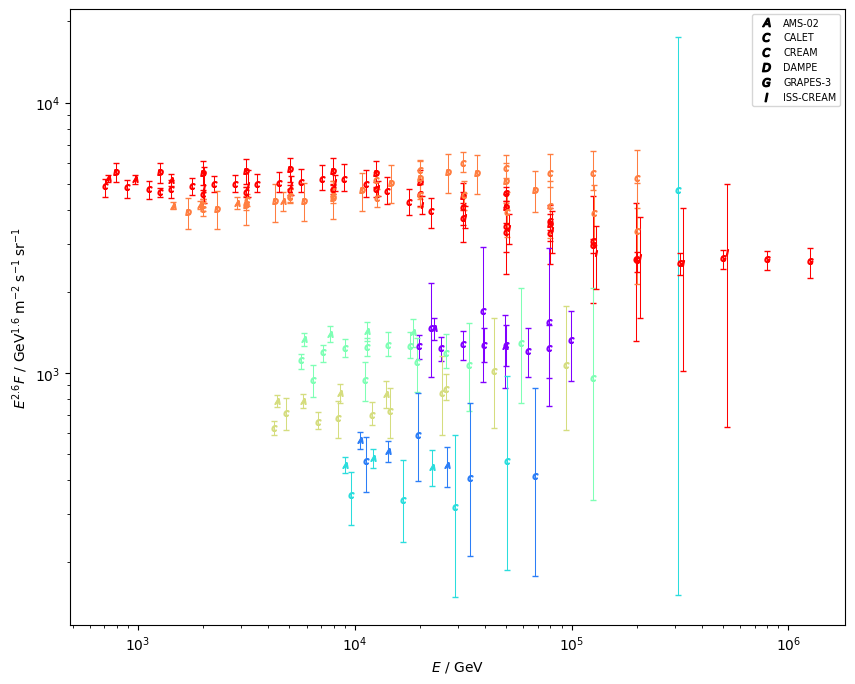

In [2]:
fit_data.plot(scale=2.6);

In [3]:
from bayesian_analysis import FitConfig, PlotsConfig, run_ml_analysis
from cr_knee_fit.cr_model import CosmicRaysModelConfig, SpectralBreakConfig
from cr_knee_fit.elements import Element
from cr_knee_fit.guesses import initial_guess_one_population_model
from cr_knee_fit.model_ import ModelConfig

bestfit = run_ml_analysis(
    fit_data=fit_data,
    config=FitConfig.from_guessing_func(
        name="element-balance",
        fit_data=fit_data.config,
        mcmc=None,
        plots=PlotsConfig(),
        generate_guess=lambda: initial_guess_one_population_model(
            ModelConfig(
                cr_model_config=CosmicRaysModelConfig(
                    components=[[el] for el in Element.regular()],
                    breaks=[
                        SpectralBreakConfig(
                            fixed_lg_sharpness=0.7,
                            is_softening=True,
                            lg_break_prior_limits=(3.5, 4.5),
                        ),
                        SpectralBreakConfig(
                            fixed_lg_sharpness=0.7,
                            is_softening=False,
                            lg_break_prior_limits=(4.5, 5.5),
                        ),
                    ],
                ),
                shifted_experiments=fit_data.config.experiments_spectrum,
            )
        ),
    ),
    freeze_shifts=False,
)

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 37.026632215907
             x: [-4.106e+00  2.613e+00 ... -3.711e-03  2.811e-04]
           nit: 9770
          nfev: 12162
 final_simplex: (array([[-4.106e+00,  2.613e+00, ..., -3.711e-03,
                         2.811e-04],
                       [-4.106e+00,  2.613e+00, ..., -3.711e-03,
                         2.811e-04],
                       ...,
                       [-4.106e+00,  2.613e+00, ..., -3.711e-03,
                         2.811e-04],
                       [-4.106e+00,  2.613e+00, ..., -3.711e-03,
                         2.811e-04]]), array([ 3.703e+01,  3.703e+01, ...,  3.703e+01,  3.703e+01]))


Data(element_spectra={Experiment(name='AMS-02', filename_stem='AMS-02'): {<Element.H: 1>: CRSpectrumData(E=array([ 727. ,  963.8, 1426. ]), F=array([1.905e-04, 9.068e-05, 3.260e-05]), F_errlo=array([6.32850693e-06, 3.52195968e-06, 1.60449369e-06]), F_errhi=array([6.32850693e-06, 3.52195968e-06, 1.60449369e-06]), experiment=Experiment(name='AMS-02', filename_stem='AMS-02'), element=<Element.H: 1>, energy_scale_shift=1.0), <Element.He: 2>: CRSpectrumData(E=array([1454., 1928., 2852., 4648.]), F=array([2.492e-05, 1.206e-05, 4.416e-06, 1.259e-06]), F_errlo=array([7.20780827e-07, 4.27551167e-07, 2.18431339e-07, 1.00345653e-07]), F_errhi=array([7.20780827e-07, 4.27551167e-07, 2.18431339e-07, 1.00345653e-07]), experiment=Experiment(name='AMS-02', filename_stem='AMS-02'), element=<Element.He: 2>, energy_scale_shift=1.0), <Element.C: 6>: CRSpectrumData(E=array([ 4362.,  5783.,  8557., 13940.]), F=array([2.717e-07, 1.304e-07, 5.023e-08, 1.404e-08]), F_errlo=array([1.34017868e-08, 7.96357891e-09,

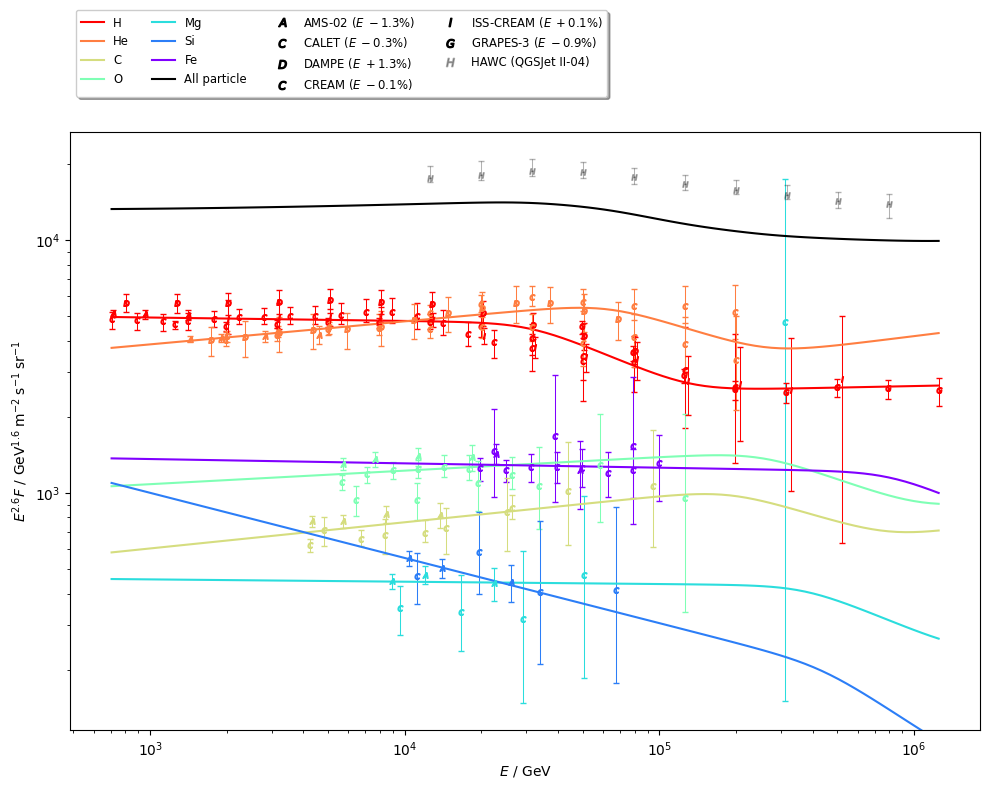

In [4]:
assert bestfit is not None
bestfit.plot_spectra(
    fit_data=fit_data,
    scale=2.6,
    validation_data=Data.load(config=DataConfig(experiments_all_particle=[experiments.hawc])),
);